In [1]:
#import libraries
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


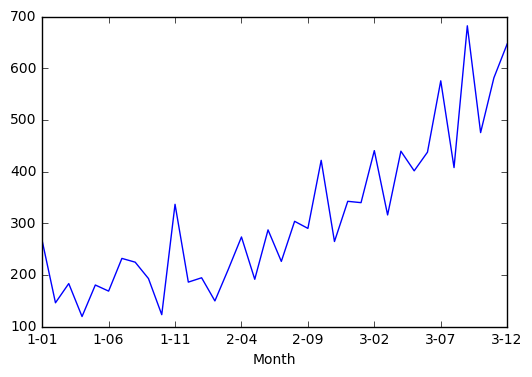

In [2]:
#load and plot dataset
series1 = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#summarize first few rows
print(series1.head())

#lineplot
series1.plot()
pyplot.show()

    


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64


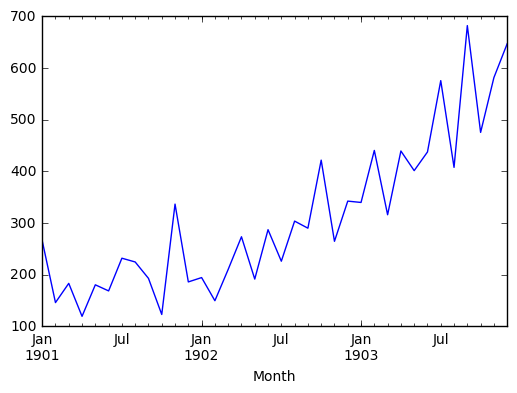

In [3]:

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


#summarize first few rows
print(series)

#lineplot
series.plot()
pyplot.show()

In [4]:
#split data into train and test
X = series.values
train,test = X[0:-12], X[12:]

In [5]:
print(series.values)

[ 266.   145.9  183.1  119.3  180.3  168.5  231.8  224.5  192.8  122.9
  336.5  185.9  194.3  149.5  210.1  273.3  191.4  287.   226.   303.6
  289.9  421.6  264.5  342.3  339.7  440.4  315.9  439.3  401.3  437.4
  575.5  407.6  682.   475.3  581.3  646.9]


In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from math import sqrt

In [8]:
#walk-forward validation
history = [x for x in train]
print(history)
print(history[-1])

[266.0, 145.90000000000001, 183.09999999999999, 119.3, 180.30000000000001, 168.5, 231.80000000000001, 224.5, 192.80000000000001, 122.90000000000001, 336.5, 185.90000000000001, 194.30000000000001, 149.5, 210.09999999999999, 273.30000000000001, 191.40000000000001, 287.0, 226.0, 303.60000000000002, 289.89999999999998, 421.60000000000002, 264.5, 342.30000000000001]
342.3


In [9]:
predictions = list()
print(predictions)
print(test[0])
print(test)

[]
194.3
[ 194.3  149.5  210.1  273.3  191.4  287.   226.   303.6  289.9  421.6
  264.5  342.3  339.7  440.4  315.9  439.3  401.3  437.4  575.5  407.6
  682.   475.3  581.3  646.9]


In [10]:
print(range(len(test)))

range(0, 24)


In [11]:
for i in range(len(test)):
    #make the predictions list
    predictions.append(history[-1])
    # observation data
    history.append(test[i])

In [12]:
print(predictions)


[342.30000000000001, 194.30000000000001, 149.5, 210.09999999999999, 273.30000000000001, 191.40000000000001, 287.0, 226.0, 303.60000000000002, 289.89999999999998, 421.60000000000002, 264.5, 342.30000000000001, 339.69999999999999, 440.39999999999998, 315.89999999999998, 439.30000000000001, 401.30000000000001, 437.39999999999998, 575.5, 407.60000000000002, 682.0, 475.30000000000001, 581.29999999999995]


In [14]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))

In [53]:
#predictions.clear()
#history.clear()

In [62]:
print(len(predictions))
print(len(test))
print(len(series))
print(len(train))
print(train)

24
24
36
24
[ 266.   145.9  183.1  119.3  180.3  168.5  231.8  224.5  192.8  122.9
  336.5  185.9  194.3  149.5  210.1  273.3  191.4  287.   226.   303.6
  289.9  421.6  264.5  342.3]


In [15]:
print('RMSE: %.3f' %rmse)

RMSE: 117.239


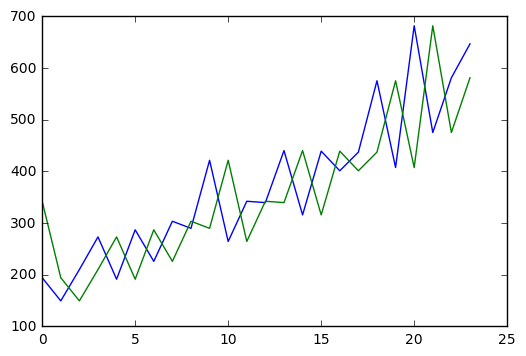

In [16]:
#line plot or observed and predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [35]:
from pandas import DataFrame
import pandas as pd

In [36]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [37]:
supervised = timeseries_to_supervised(X,1)

In [38]:
print(supervised.head())

       0      0
0    0.0  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [39]:
## Transform Time Series to Stationary
# differencing methodology

In [41]:
from pandas import Series

In [43]:
# create a function for creating a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [44]:
#invert the differenced values
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [45]:
#transform to be stationary
differenced = difference(series,1)

In [46]:
print(differenced.head())

0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
dtype: float64


In [63]:
#invert transform
inverted=list()
for i in range(len(differenced)):
    value = inverse_difference(series, differenced[i], len(series)-i)
    inverted.append(value)

In [64]:
inverted = Series(inverted)

In [65]:
print(inverted.head())

0    145.9
1    183.1
2    119.3
3    180.3
4    168.5
dtype: float64


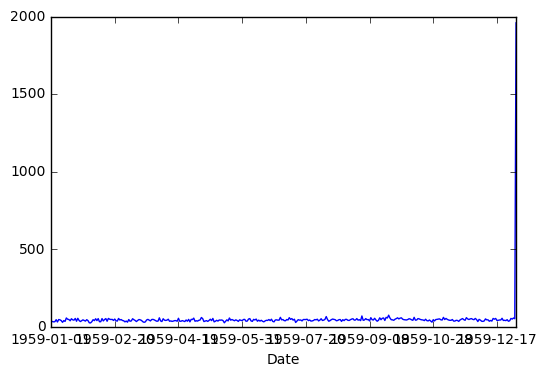

In [1]:
from pandas import Series
from matplotlib import pyplot
birth = Series.from_csv("daily-total-female-births-in-cal.csv", header=0)
birth.plot()
pyplot.show()

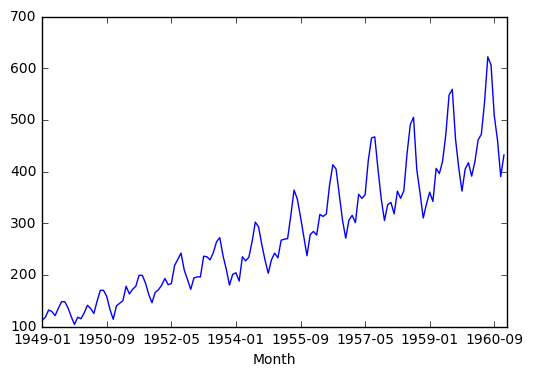

In [2]:
# airline passengers data
airline = Series.from_csv("international-airline-passengers.csv", header=0)
airline.plot()
pyplot.show()

#Types of Stationary Time series
#Stationary Process: A process that generates a stationary series of observations.#Stationary Model: A model that describes a stationary series of observations.
#Trend Stationary: A time series that does not exhibit a trend.
#Seasonal Stationary: A time series that does not exhibit seasonality.
#Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.


#treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods

#checks for stationarity
# look at the plots
# Summary Statistics
# Statistical tests

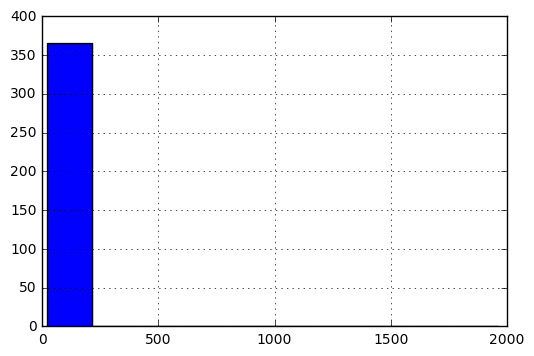

In [5]:
# Daily Brith Dataset
# quick check of the histogram to see if it is Gaussian

from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-total-female-births-in-cal.csv', header = 0)
series.hist()
pyplot.show()

In [12]:
#we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
X = series.values
split = int(len(X)/2)
print(split)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:%f ; mean:%f' % (mean1, mean2))
print('var:%f ; var:%f' % (var1, var2))

183
mean:39.792350 ; mean:54.644809
var:49.093493 ; var:19974.906626


In [34]:
#Airline Passengers Dataset
from pandas import Series
air_series = Series.from_csv('international-airline-passengers.csv', header = 0)
air_series = air_series.dropna()
air_X = air_series.values
print(len(air_X))
air_split = int(len(air_X)/2)
print(air_split)
air_X1 = air_X[0:air_split]
air_X2 = air_X[air_split:]
print(len(air_X2))
air_mean1 = air_X1.mean()
air_mean2 = air_X2.mean()
air_var1, air_var2 = air_X1.var(), air_X2.var()
print('mean1:%f' % (air_mean1))
print('mean2:%f' % (air_mean2))
print('var:%f ; var:%f' % (air_var1, air_var2))


144
72
72
mean1:182.902778
mean2:377.694444
var:2244.087770 ; var:7367.962191


In [33]:
from pandas import Series
series = Series.from_csv('international-airline-passengers.csv', header=0)
series = series.dropna()
X = series.values
split = int(len(X) / 2)
print(split)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

72
mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


mean and variance look very different.

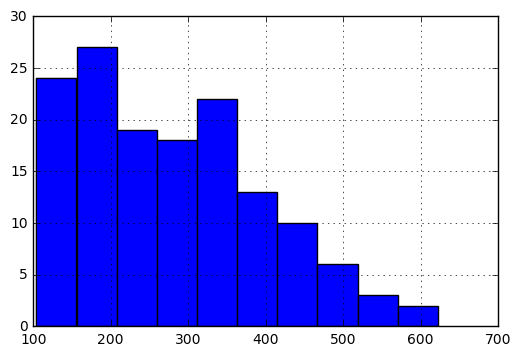

In [35]:
from matplotlib import pyplot
from pandas import Series
series = Series.from_csv('international-airline-passengers.csv', header=0)
series.hist()
pyplot.show()

distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

there is an obvious seasonality component, and it looks like the seasonality component is growing.
A log transform can be used to flatten out exponential change back to a linear relationship.

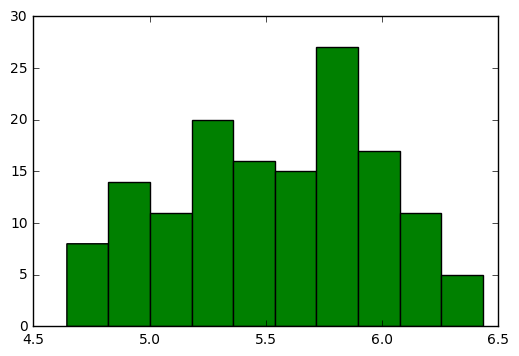

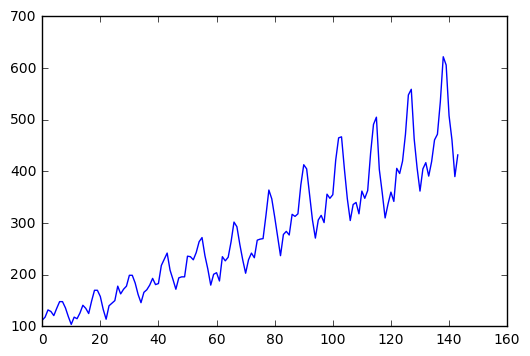

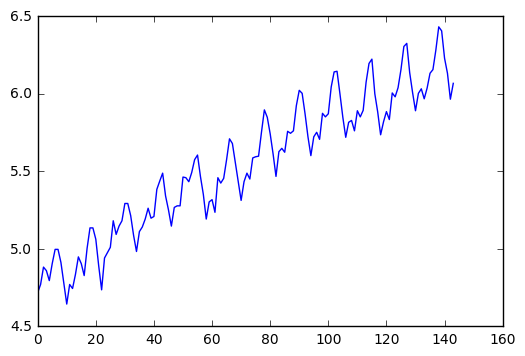

In [51]:
# perform log transform on the airline dataser
from pandas import Series
from matplotlib import pyplot
from numpy import log
series1 = Series.from_csv('international-airline-passengers.csv', header=0)
series1 = series1.dropna()
original = series1.values
X1 = series1.values
X1 = log(X1)
pyplot.hist(X1)
pyplot.show()
pyplot.plot(original)
pyplot.show()
pyplot.plot(X1)
pyplot.show()

create a line plot of the log transformed data and can see the exponential growth seems diminished, but we still have a trend and seasonal elements.

We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [55]:
from pandas import Series
from matplotlib import pyplot
from numpy import log
series = Series.from_csv('international-airline-passengers.csv', header=0)
series = series.dropna()
X = series.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


shows mean and standard deviation values for each group that are again similar, but not identical